# Pauli Operators, Single & Multiple Qubit Gates, and Measurements

### 1. What is a Quantum Gate?

Quantum gates give us the possibilities to manipulate quantum states.

Every **unitary operator**, that is every matrix that fulfills $U^\dagger U = \mathbb{I}$, can be considered a quantum gate in a formal sense:

- always reversible transformations.

- cannot generate new qubits (*No-Cloning Therem*), therefore, they have the same amount of inputs and outputs.

- there is exactly one conduit per qubit in a circuit.

### 2. Single Qubit Gates

In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit

state = Statevector.from_instruction(qc)
print(state)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


#### The X-gate

The X-gate is the quantum analogy of the classical NOT gate, or simply known as the bit flip gate. 

- $X|0\rangle$ &rarr; $|1\rangle$ 

- $X|1\rangle$ &rarr; $|0\rangle$ 

It is represented by the **Pauli-X** matrix:

$$
X = 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
= |0\rangle \langle 1| + |1\rangle \langle 0|
$$

When applied to any quantum state $|\psi \rangle = \alpha |0\rangle + \beta |1\rangle$:

$$
X|\psi \rangle = 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
\alpha\\
\beta
\end{pmatrix}
=
\begin{pmatrix}
\beta\\
\alpha
\end{pmatrix}
= \beta|0\rangle + \alpha|1\rangle 
$$


\* *Exercise:*

- Calculate $X|0\rangle$ 

- Calculate $X|1\rangle$ 

##### The X-gate in Qiskit:

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
   ┌───┐
q: ┤ X ├
   └───┘


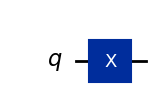

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.x(0)  # Apply X-gate to qubit 0

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl')  

\* To make the 'mpl' output work: *pip install pylatexenc*

#### The Z-gate

The Z-gate is leaves $|0\rangle$ unchanged, BUT switches the sign of $|1\rangle$.

- $Z|0\rangle$ &rarr; $|0\rangle$ 

- $Z|1\rangle$ &rarr; $-|1\rangle$ 

It is represented by the **Pauli-Z** matrix:

$$
Z = 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
= |0\rangle \langle 0| - |1\rangle \langle 1|
$$

\* *Exercise:*

- Calculate $Z|0\rangle$ 

- Calculate $Z|1\rangle$ 

##### The Z-gate in Qiskit:

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
   ┌───┐
q: ┤ Z ├
   └───┘


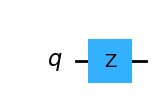

In [4]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.z(0)  # Apply Z-gate to qubit 0

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl')  

To see that the Z-gate switches the sign of the $|1\rangle$ state, we first need to apply the X-gate:

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘


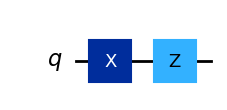

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.x(0)  # Apply X-gate to qubit 0 
qc.z(0)  # Apply Z-gate to qubit 0

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl')  

#### The Hadamard Gate

The Hadamard gate creates a superposition of $|0\rangle$ and $|1\rangle$ from the states $|0\rangle$ and $|1\rangle$:

- $H|0\rangle$ &rarr; $|+\rangle$ = $\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$

- $H|1\rangle$ &rarr; $|-\rangle$ = $\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$


and its matrix representation:

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$



\* *Exercise:*

- Calculate $H|0\rangle$ 

- Calculate $H|1\rangle$ 

##### The Hadamard Gate in Qiskit:

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
   ┌───┐
q: ┤ H ├
   └───┘


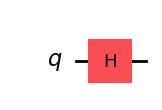

In [6]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.h(0)  # Apply Hadamard gate to qubit 0

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl') 

### 3. Multiple Qubits Gates

#### The CNOT gate

The CNOT, or controlled NOT, gate affects the quantum state of 2-qubit systems. 

The first qubit is called a **control qubit** and the second one is the **target qubit**:

- if the control qubit is set to 0, the target one remains unchanged.

    - $CNOT|00\rangle$ &rarr; $|00\rangle$ 

    - $CNOT|01\rangle$ &rarr; $|01\rangle$ 

- if the control qubit is set to 1, the target qubit gets inverted.

    - $CNOT|10\rangle$ &rarr; $|11\rangle$ 

    - $CNOT|11\rangle$ &rarr; $|10\rangle$ 

the matrix representation of the CNOT gate is the following:

$$
CNOT = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

\* *Exercise:*

- Calculate $CNOT|01\rangle$ 

- Calculate $CNOT|10\rangle$ 

##### The CNOT Gate in Qiskit:

Here, the control qubit is in the $|0\rangle$ state, just as it is initialised.

\* *Spoiler* : the statevector remains the same, showing the $|00\rangle$ state. 

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


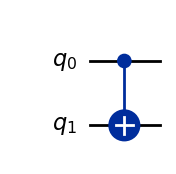

In [7]:
qc = QuantumCircuit(2)  # Create a quantum circuit with 2 qubits
qc.cx(0,1) # Apply CNOT gate with control qubit 0 and target qubit 1

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl') 

But if the control qubit is in the $|1\rangle$ state, then the outout state becomes $|11\rangle$:

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


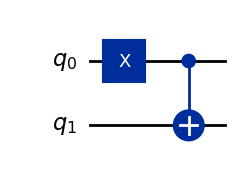

In [8]:
qc = QuantumCircuit(2)  # Create a quantum circuit with 2 qubits
qc.x(0)  # Apply X-gate to qubit 0
qc.cx(0,1) # Apply CNOT gate with control qubit 0 and target qubit 1

state = Statevector.from_instruction(qc)
print(state)

print(qc)

qc.draw(output='mpl') 

### Measurements

Measurements are performed at the end of the quntum circuit (sometimes assumed that every qubit is measured even without explicit notation). They are performed in the computational basis (often only in an implicit manner). A measurement in the computational basis means a projection onto the states $|0\rangle$ and $|1\rangle$.

Measurement symbol in Qiskit:

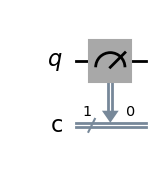

In [9]:
qc = QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit

qc.measure(0, 0) # Measure qubit 0 and store result in classical bit 0

qc.draw(output='mpl')

In case quantum states should be measured in another measurement basis, a suitable transformation can be integrated in the circuit before the measurement.

\* *Example:*

Prior to measuring in the X-basis, a Hadamard gate is applied to the state:

$$
|\psi \rangle = \alpha |+\rangle + \beta |-\rangle
$$
$$
H|\psi \rangle = \alpha |0\rangle + \beta |1\rangle
$$

The Hadamard gate 'transfers' the probability amplitudes of the states $|+\rangle$ and $|-\rangle$ to the computational basis.

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


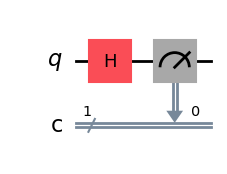

In [10]:
qc = QuantumCircuit(1,1)  # Create a quantum circuit with 1 qubit and 1 classical bit
qc.h(0)  # Apply Hadamard gate to qubit 0

state = Statevector.from_instruction(qc)
print(state)

qc.measure(0, 0)  # Measure qubit 0 and store result in classical bit 0

qc.draw(output='mpl')

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


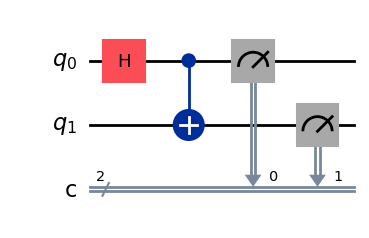

In [11]:
qc = QuantumCircuit(2, 2) # Create a quantum circuit with 2 qubits and 2 classical bits
qc.h(0) 
qc.cx(0,1)

qc.measure(0, 0)  # Measure qubit 0 and store result in classical bit 0
qc.measure(1, 1)  # Measure qubit 1 and store result in classical bit 1

print(qc)

qc.draw(output='mpl')  


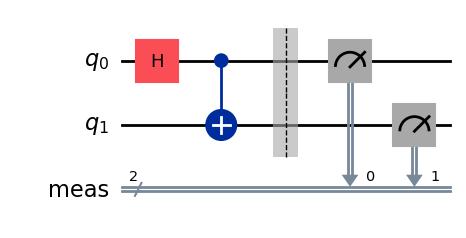

In [12]:
qc = QuantumCircuit(2) # Create a quantum circuit with 2 qubits 
qc.h(0) 
qc.cx(0,1)

qc.measure_all()  # Measure all qubits and store results in classical bits

qc.draw(output='mpl')  

#### Simulator and Backends in Qiskit

In Qiskit, a **backend** is the device (simulator or real quantum computer) that runs our quantum circuits.  
- **Simulator backends** run the circuit on a classical computer, mimicking quantum behavior.  
- **Real-device backends** run the circuit on actual quantum hardware.

Here we use **`Aer`** — Qiskit’s high-performance simulator — with the `aer_simulator` backend to execute our circuit and gather measurement results.  

In [13]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

\* If you don’t have Qiskit Aer installed, you can install it in your environment with: *pip install qiskit-aer*


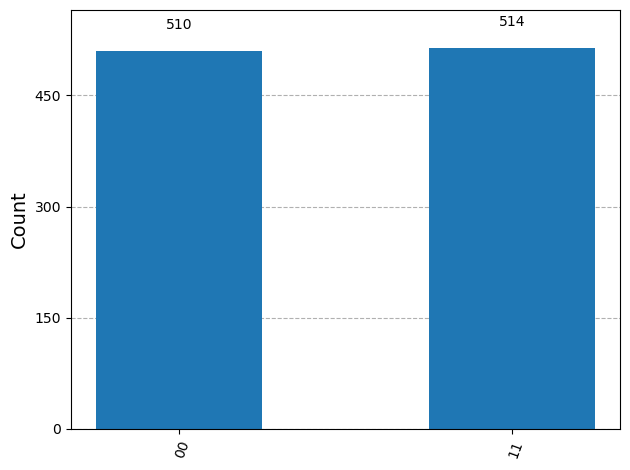

In [14]:
# Run the circuit on the simulator
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc).result()
counts = result.get_counts()

# Display the histogram
plot_histogram(counts)